<a href="https://colab.research.google.com/github/Gauravlightnin95/cat_dog_recognise_garv/blob/main/garv95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1 of boot camp

In [25]:
!pip install -q kaggle
#install files from kaggle

In [26]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gauravkumar95","key":"c2234194c0b1256541ceae011860586b"}'}

In [27]:
!mkdir ~/.kaggle
#making a kaggle directory
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [28]:
!chmod 600 ~/.kaggle/kaggle.json

In [29]:
import kagglehub

# Store whole data from kaggle
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)
# it will print path

Path to dataset files: /kaggle/input/mnist-dataset


In [30]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [31]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


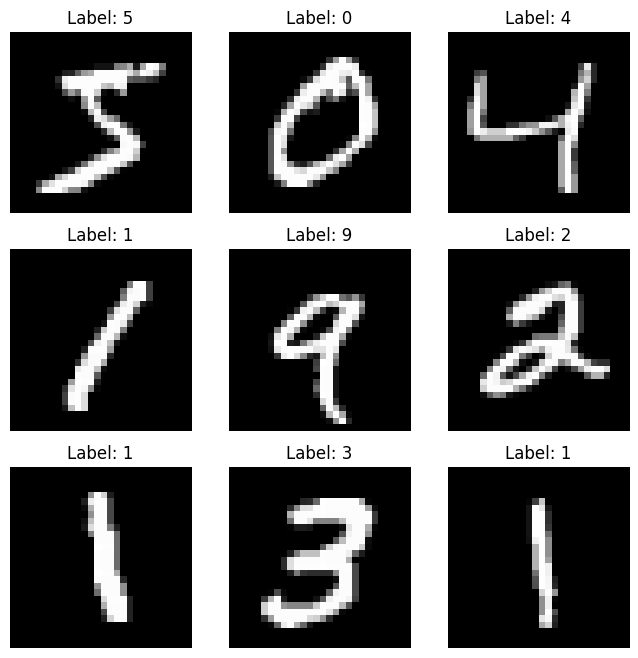

In [32]:
import matplotlib.pyplot as plt
#library in python to visualise the data in image form
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [33]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")
#Cifar is a data like mnist but have more visuals

CIFAR-10 train shape: (50000, 32, 32, 3)


  Learnt how to add kaggle dataset and train model using cifar 10
Also learnt use of matplotlib and tensorflow Day 1 end.

Day 2 below is CNN model

In [34]:
from tensorflow.keras.models import Sequential
#We buid CNN model in sequential way
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Above is training model with 32 patterns
,adam is smart algorithim , model fit start traing x train y train used to train models

In [35]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
# epoch increases efficiency

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.8942 - loss: 0.3405 - val_accuracy: 0.9831 - val_loss: 0.0553
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9858 - val_loss: 0.0470
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9865 - val_loss: 0.0483
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9876 - val_loss: 0.0438
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9955 - loss: 0.0127 - val_accuracy: 0.9901 - val_loss: 0.0406


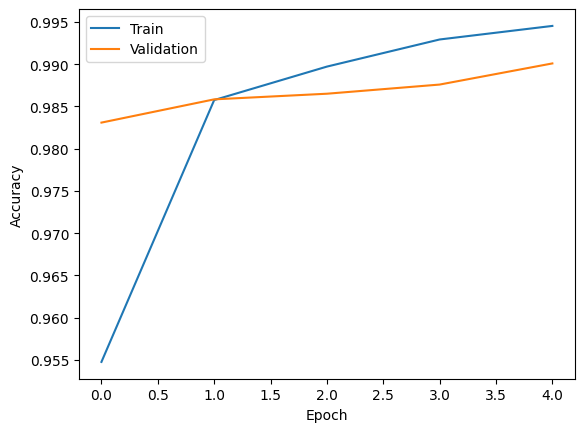

In [36]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9862 - loss: 0.0424
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [38]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Day 2 End Trained test model found accuracy plotted Accuracy

Day 3 Start

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [40]:
from tensorflow.keras.layers import BatchNormalization
#adjusts all images and balance them & model won't get stuck
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    #prvious was 64 patterns now 128 increased
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    # dropout is used to avoid over recognation
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 87ms/step - accuracy: 0.3515 - loss: 1.7589 - val_accuracy: 0.5442 - val_loss: 1.2598
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 83ms/step - accuracy: 0.5291 - loss: 1.3218 - val_accuracy: 0.5030 - val_loss: 1.4560
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 85ms/step - accuracy: 0.5850 - loss: 1.1922 - val_accuracy: 0.5928 - val_loss: 1.2011
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.6144 - loss: 1.1107 - val_accuracy: 0.6675 - val_loss: 0.9556
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.6346 - loss: 1.0454 - val_accuracy: 0.6298 - val_loss: 1.0956
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.6472 - loss: 1.0114 - val_accuracy: 0.6748 - val_loss: 0.9576
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.6609 - loss: 0.9868 - val_accuracy: 0.6505 - val_loss: 1.0432
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.6754 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1000
           1       0.88      0.84      0.86      1000
           2       0.62      0.64      0.63      1000
           3       0.65      0.45      0.53      1000
           4       0.77      0.56      0.65      1000
           5       0.67      0.65      0.66      1000
           6       0.75      0.80      0.77      1000
           7       0.67      0.82      0.74      1000
           8       0.84      0.83      0.83      1000
           9       0.73      0.88      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



<function matplotlib.pyplot.show(close=None, block=None)>

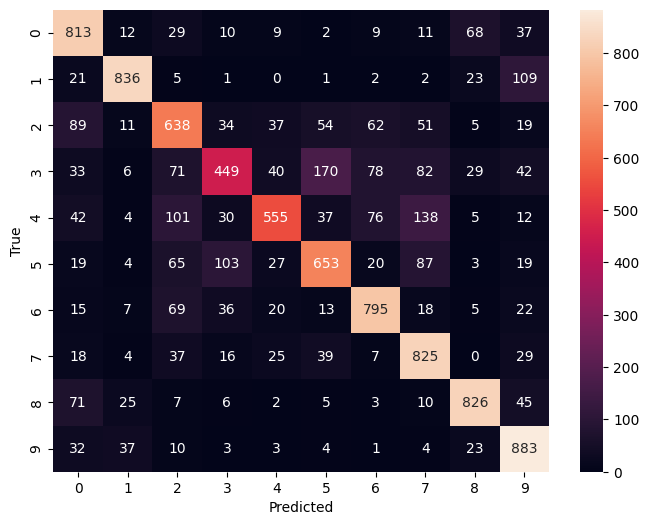

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
# we are looking where model made mistakes
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

Day 3 end above is the heat map of the model giving prediction and error, we can also see accuracy , weighted avg also

Day 4 Start (Learned thatexample of pretrained model are MobileNetV2,ResNet,VGG,ImageNet)

In [42]:
!kaggle datasets download -d tongpython/cat-and-dog
#It means give me the data of dogs and cat

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 89% 194M/218M [00:00<00:00, 467MB/s]  
100% 218M/218M [00:00<00:00, 437MB/s]


In [43]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [45]:
# Using mobilenetv2 image recognizing model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.7825 - loss: 0.5519 - val_accuracy: 0.7985 - val_loss: 0.5112
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.7983 - loss: 0.4981 - val_accuracy: 0.7985 - val_loss: 0.5096
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.7921 - loss: 0.4959 - val_accuracy: 0.7985 - val_loss: 0.5254
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.7983 - loss: 0.4718 - val_accuracy: 0.7985 - val_loss: 0.5420
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.8028 - loss: 0.4559 - val_accuracy: 0.7985 - val_loss: 0.5408


In [46]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1762s 7s/step - accuracy: 0.8039 - loss: 0.4819 - val_accuracy: 0.7985 - val_loss: 0.5389
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1743s 7s/step - accuracy: 0.8029 - loss: 0.4460 - val_accuracy: 0.7985 - val_loss: 0.5369
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1753s 7s/step - accuracy: 0.8057 - loss: 0.4272 - val_accuracy: 0.7975 - val_loss: 0.5382


In [48]:
model.save('mobilenet_cats_dogs.h5')
#Model Saved
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step


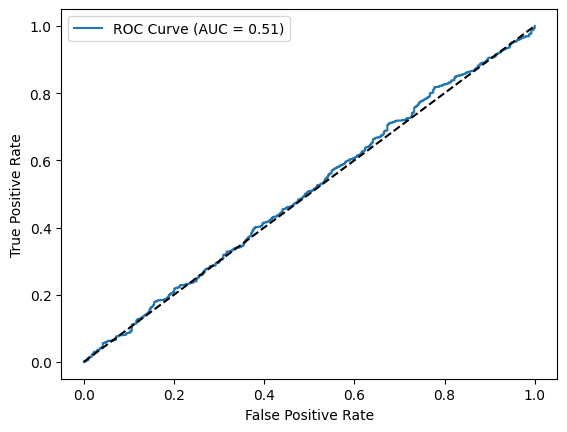

In [49]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Day 4 End (Saved & Trained our model took a lot time)

Day 5 (Testing Our model and ploting accuracies)

In [54]:
from google.colab import files
uploaded = files.upload()  # Upload animal picture

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'dog1.jpg'  # Using My filenme
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving dog1.jpg to dog1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Predicted class: Dog


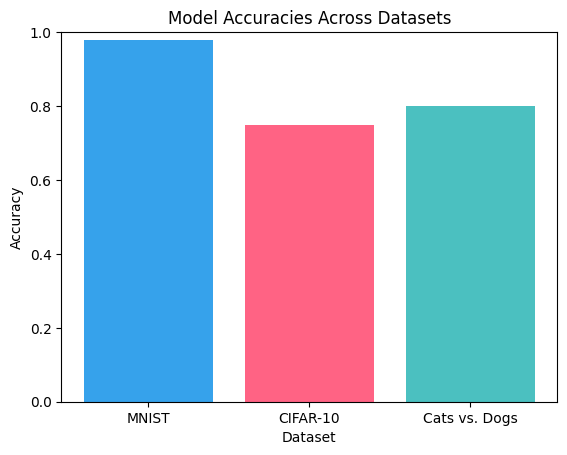

In [56]:
#Plotting accuracies
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.80]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()